# Deconvolve simulated data with linear functions, vary number of samples

In [1]:
import torch
from ternadecov.simulator import *
from ternadecov.time_deconv import *
from ternadecov.evaluation import *
import matplotlib.pyplot as plt

# Configure

In [2]:
device = torch.device("cuda:0")
dtype = torch.float32
dtype_np = np.float32

# Load data

In [3]:
bulk_anndata_path = "/home/nbarkas/disk1/work/deconvolution_method/datasets/ebov/load_data_python/ebov_bulk.h5ad"
sc_anndata_path = "/home/nbarkas/disk1/work/deconvolution_method/datasets/ebov/load_data_python/ebov_sc.h5ad"

In [4]:
with open(sc_anndata_path, 'rb') as fh:
    sc_anndata = anndata.read_h5ad(fh)

# Simulate data

In [5]:
ebov_sc_dataset = SingleCellDataset(sc_anndata, sc_celltype_col="Subclustering_reduced", dtype_np=dtype_np, dtype = dtype, device=device)

In [6]:
# trajectory generating function
trajectory_type = 'periodic'
n_sample_range = list(range(100,1000,100)) 
n_sample_range

[100, 200, 300, 400, 500, 600, 700, 800, 900]

In [7]:
# Use a single trajectory for all iterations
trajectory_coef = sample_trajectories(
    type = trajectory_type,
    num_cell_types = ebov_sc_dataset.w_hat_gc.shape[1]
)

In [9]:
n_iters = 3_000

n_samples = []
l1_error_norm = []
fit_time = []

for n in n_sample_range:
    eval_result = evaluate_with_trajectory(
        sc_dataset = ebov_sc_dataset, 
        n_samples = n, 
        trajectory_type = trajectory_type, 
        trajectory_coef = trajectory_coef,
        n_iters = n_iters,
        dtype_np = dtype_np,
        dtype = dtype,
        device = device,
    )
    
    n_samples.append(eval_result['n_samples'])
    l1_error_norm.append(eval_result['l1_error_norm'])
    fit_time.append(eval_result['fit_time'])
    
evaluation_resuts_df = pd.DataFrame({'n_samples':n_samples, 'l1_error_norm': list(x.item() for x in l1_error_norm), 'fit_time': fit_time})

/home/nbarkas/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


[step: 0, time: 1 s ] loss: 5871703.93
[step: 1000, time: 13 s ] loss: 4873315.48
[step: 2000, time: 25 s ] loss: 4356808.76
[step: 0, time: 1 s ] loss: 11792553.43
[step: 1000, time: 17 s ] loss: 9780242.35
[step: 2000, time: 33 s ] loss: 8718554.44
[step: 0, time: 1 s ] loss: 17797226.93
[step: 1000, time: 21 s ] loss: 14742018.16
[step: 2000, time: 41 s ] loss: 13120959.21
[step: 0, time: 1 s ] loss: 23694768.43
[step: 1000, time: 26 s ] loss: 19632646.13
[step: 2000, time: 50 s ] loss: 17467891.43
[step: 0, time: 1 s ] loss: 29540741.93
[step: 1000, time: 31 s ] loss: 24472491.17
[step: 2000, time: 61 s ] loss: 21765160.96
[step: 0, time: 1 s ] loss: 35283627.43
[step: 1000, time: 35 s ] loss: 29280735.61
[step: 2000, time: 69 s ] loss: 26062764.11
[step: 0, time: 1 s ] loss: 40980604.93
[step: 1000, time: 41 s ] loss: 34054048.46
[step: 2000, time: 80 s ] loss: 30345917.33
[step: 0, time: 1 s ] loss: 47216902.43
[step: 1000, time: 45 s ] loss: 39150083.07
[step: 2000, time: 88 s ]

In [10]:
evaluation_resuts_df = pd.DataFrame({'n_samples':n_samples, 'l1_error_norm': list(x.item() for x in l1_error_norm), 'fit_time': fit_time})

In [11]:
evaluation_resuts_df

,n_samples,l1_error_norm,fit_time
0,100,0.962168,36.696340
1,200,0.967723,48.681676
2,300,0.968914,60.949620
3,400,0.965473,74.974272
4,500,0.965532,91.292553
5,600,0.966738,104.116902
6,700,0.968204,118.814096
7,800,0.970816,130.918926
8,900,0.967585,152.753604


## Plot

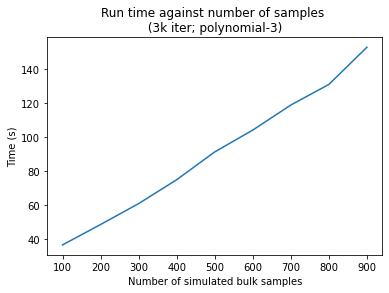

In [33]:
# Plot run-time
plt.plot(evaluation_resuts_df.n_samples.to_numpy(), evaluation_resuts_df.fit_time.to_numpy())
plt.xlabel("Number of simulated bulk samples")
plt.ylabel("Time (s)")
plt.title("Run time against number of samples \n (3k iter; polynomial-3)")
plt.savefig("../results/runtime_vs_bulk-vary_n-3k_iter-polynomial_3.png", dpi=300)

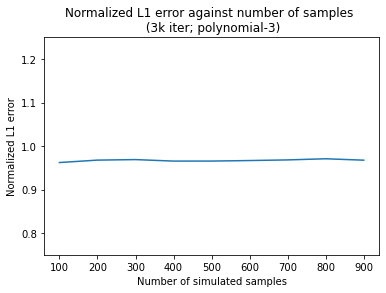

In [39]:
# Plot L1 loss
plt.plot(evaluation_resuts_df.n_samples.to_numpy(), evaluation_resuts_df.l1_error_norm.to_numpy())
plt.xlabel("Number of simulated samples")
plt.ylabel("Normalized L1 error")
plt.title("Normalized L1 error against number of samples \n (3k iter; polynomial-3)")
plt.ylim(0.75,1.25)
plt.savefig("../results/NormL1_vs_bulk-vary_n-3k_iter-polynomial_3.png", dpi=300)